In [1]:
import sys
sys.path.append("../src")
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torch.nn.functional as F

import glob
import os
from datetime import datetime
import time
import math
from tqdm import tqdm

from itertools import repeat
from torch.nn.parameter import Parameter
import collections
import matplotlib
from torch_utils import *
from ExplicitModels import *
from visualization import *
# matplotlib.use('Agg')

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [3]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor(),])

mnist_dset_train = torchvision.datasets.MNIST('./data', train=True, transform=transform, target_transform=None, download=True)
train_loader = torch.utils.data.DataLoader(mnist_dset_train, batch_size=20, shuffle=True, num_workers=0)

mnist_dset_test = torchvision.datasets.MNIST('./data', train=False, transform=transform, target_transform=None, download=True)
test_loader = torch.utils.data.DataLoader(mnist_dset_test, batch_size=20, shuffle=False, num_workers=0)

In [4]:
# activation = F.relu
# architecture = [784, 128, 64, 10]
# lambda_ = 0.99999
# epsilon = 0.2
# supervised_lambda_weight = 1e-3
# neural_lr_start = 0.001 
# neural_lr_stop = 0.0005 
# neural_lr_rule = "constant"
# neural_lr_decay_multiplier = 0.005
# neural_dynamic_iterations = 50
activation = F.relu
architecture = [784, 500, 64, 10]
lambda_ = 0.99999
epsilon = 0.01
supervised_lambda_weight = 1e-3
neural_lr_start = 0.1 
neural_lr_stop = 0.0005 
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.005
neural_dynamic_iterations = 50

model = CorInfoMaxNudged(architecture, lambda_, epsilon, activation, use_stepLR = True, 
                         sgd_nesterov = False, optimizer_type = "sgd", 
                         optim_lr = 1, stepLR_step_size = 10*3000,)

In [ ]:
trn_acc_list = []
tst_acc_list = []
random_sign = False
n_epochs = 50

for epoch_ in range(n_epochs):
    Bcopy = torch.clone(model.B[0]["weight"])
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))
    print("B_1 update difference : {}".format(torch.norm(model.B[0]['weight'] - Bcopy)))

3000it [03:33, 14.07it/s]
1it [00:00,  8.23it/s]

Epoch : 1, Train Accuracy : 0.9461333333333334, Test Accuracy : 0.9451
B_1 update difference : 4.447171688079834


3000it [03:33, 14.04it/s]
1it [00:00,  8.15it/s]

Epoch : 2, Train Accuracy : 0.9618833333333333, Test Accuracy : 0.9594
B_1 update difference : 2.584958791732788


3000it [03:34, 14.01it/s]
1it [00:00,  7.99it/s]

Epoch : 3, Train Accuracy : 0.96895, Test Accuracy : 0.9654
B_1 update difference : 2.198758840560913


3000it [04:23, 11.39it/s]
1it [00:00,  7.92it/s]

Epoch : 4, Train Accuracy : 0.9743833333333334, Test Accuracy : 0.9705
B_1 update difference : 2.014249324798584


3000it [03:38, 13.72it/s]
1it [00:00,  7.41it/s]

Epoch : 5, Train Accuracy : 0.9785166666666667, Test Accuracy : 0.9729
B_1 update difference : 1.933569073677063


3000it [04:27, 11.22it/s]
1it [00:00,  8.04it/s]

Epoch : 6, Train Accuracy : 0.9804166666666667, Test Accuracy : 0.9731
B_1 update difference : 1.8952159881591797


3000it [04:08, 12.09it/s]
1it [00:00,  6.72it/s]

Epoch : 7, Train Accuracy : 0.9824, Test Accuracy : 0.9752
B_1 update difference : 1.8815858364105225


3000it [04:24, 11.35it/s]
1it [00:00,  7.39it/s]

Epoch : 8, Train Accuracy : 0.9843, Test Accuracy : 0.9759
B_1 update difference : 1.894534945487976


3000it [04:06, 12.17it/s]
1it [00:00,  8.40it/s]

Epoch : 9, Train Accuracy : 0.98575, Test Accuracy : 0.9769
B_1 update difference : 1.9084923267364502


3000it [04:24, 11.35it/s]
1it [00:00,  7.10it/s]

Epoch : 10, Train Accuracy : 0.9864833333333334, Test Accuracy : 0.9771
B_1 update difference : 1.9284946918487549


3000it [04:14, 11.80it/s]
1it [00:00,  7.73it/s]

Epoch : 11, Train Accuracy : 0.9880166666666667, Test Accuracy : 0.9781
B_1 update difference : 1.9498451948165894


3000it [04:03, 12.32it/s]
1it [00:00,  8.05it/s]

Epoch : 12, Train Accuracy : 0.98915, Test Accuracy : 0.9797
B_1 update difference : 1.9752049446105957


3000it [04:06, 12.19it/s]
1it [00:00,  7.97it/s]

Epoch : 13, Train Accuracy : 0.9897166666666667, Test Accuracy : 0.9784
B_1 update difference : 2.0088515281677246


3000it [03:52, 12.88it/s]
1it [00:00,  7.01it/s]

Epoch : 14, Train Accuracy : 0.99005, Test Accuracy : 0.9796
B_1 update difference : 2.0458884239196777


3000it [04:03, 12.30it/s]
1it [00:00,  7.72it/s]

Epoch : 15, Train Accuracy : 0.9907833333333333, Test Accuracy : 0.9799
B_1 update difference : 2.089392900466919


3000it [03:54, 12.79it/s]
1it [00:00,  7.76it/s]

Epoch : 16, Train Accuracy : 0.9913333333333333, Test Accuracy : 0.9795
B_1 update difference : 2.140441417694092


3000it [04:01, 12.40it/s]
1it [00:00,  8.01it/s]

Epoch : 17, Train Accuracy : 0.9921, Test Accuracy : 0.981
B_1 update difference : 2.191077709197998


3000it [03:55, 12.74it/s]
1it [00:00,  7.75it/s]

Epoch : 18, Train Accuracy : 0.9924333333333333, Test Accuracy : 0.9802
B_1 update difference : 2.2330281734466553


3000it [03:45, 13.33it/s]
1it [00:00,  9.47it/s]

Epoch : 19, Train Accuracy : 0.9928833333333333, Test Accuracy : 0.981
B_1 update difference : 2.288374662399292


3000it [03:35, 13.91it/s]
1it [00:00,  7.79it/s]

Epoch : 20, Train Accuracy : 0.9930833333333333, Test Accuracy : 0.9818
B_1 update difference : 2.3477892875671387


3000it [04:01, 12.42it/s]
1it [00:00,  8.08it/s]

Epoch : 21, Train Accuracy : 0.99345, Test Accuracy : 0.9818
B_1 update difference : 2.4198827743530273


3000it [04:02, 12.39it/s]
2it [00:00, 10.19it/s]

Epoch : 22, Train Accuracy : 0.9938333333333333, Test Accuracy : 0.9807
B_1 update difference : 2.494595766067505


3000it [03:35, 13.93it/s]
1it [00:00,  7.30it/s]

Epoch : 23, Train Accuracy : 0.9941333333333333, Test Accuracy : 0.9823
B_1 update difference : 2.56498646736145


3000it [03:53, 12.85it/s]
1it [00:00,  7.77it/s]

Epoch : 24, Train Accuracy : 0.9944333333333333, Test Accuracy : 0.9816
B_1 update difference : 2.6183218955993652


3000it [04:48, 10.38it/s]
1it [00:00,  7.07it/s]

Epoch : 25, Train Accuracy : 0.9942166666666666, Test Accuracy : 0.9823
B_1 update difference : 2.665452003479004


3000it [04:44, 10.53it/s]
1it [00:00,  7.06it/s]

Epoch : 26, Train Accuracy : 0.9946333333333334, Test Accuracy : 0.9816
B_1 update difference : 2.705965280532837


3000it [05:01,  9.97it/s]
1it [00:00,  7.99it/s]

Epoch : 27, Train Accuracy : 0.9949333333333333, Test Accuracy : 0.9815
B_1 update difference : 2.7493999004364014


3000it [04:50, 10.33it/s]
1it [00:00,  7.46it/s]

Epoch : 28, Train Accuracy : 0.9949666666666667, Test Accuracy : 0.9808
B_1 update difference : 2.825631618499756


3000it [04:32, 11.02it/s]
1it [00:00,  7.43it/s]

Epoch : 29, Train Accuracy : 0.9952333333333333, Test Accuracy : 0.9819
B_1 update difference : 2.909388303756714


3000it [04:41, 10.67it/s]
1it [00:00,  7.40it/s]

Epoch : 30, Train Accuracy : 0.9955333333333334, Test Accuracy : 0.9819
B_1 update difference : 2.9972174167633057


3000it [04:28, 11.15it/s]
1it [00:00,  8.09it/s]

Epoch : 31, Train Accuracy : 0.9957833333333334, Test Accuracy : 0.9824
B_1 update difference : 3.071753978729248


3000it [04:36, 10.84it/s]
1it [00:00,  8.24it/s]

Epoch : 32, Train Accuracy : 0.99565, Test Accuracy : 0.9819
B_1 update difference : 3.086268424987793


3000it [04:40, 10.71it/s]
1it [00:00,  8.18it/s]

Epoch : 33, Train Accuracy : 0.9959166666666667, Test Accuracy : 0.982
B_1 update difference : 3.1115853786468506


3000it [04:39, 10.73it/s]
1it [00:00,  8.45it/s]

Epoch : 34, Train Accuracy : 0.996, Test Accuracy : 0.9833
B_1 update difference : 3.17366886138916


3000it [04:36, 10.87it/s]
1it [00:00,  7.40it/s]

Epoch : 35, Train Accuracy : 0.9961833333333333, Test Accuracy : 0.9824
B_1 update difference : 3.3037924766540527


3000it [04:44, 10.55it/s]
1it [00:00,  7.39it/s]

Epoch : 36, Train Accuracy : 0.9961, Test Accuracy : 0.9821
B_1 update difference : 3.484273910522461


3000it [04:50, 10.33it/s]
1it [00:00,  8.07it/s]

Epoch : 37, Train Accuracy : 0.9961166666666667, Test Accuracy : 0.9824
B_1 update difference : 3.5730433464050293


3000it [04:46, 10.47it/s]
1it [00:00,  7.65it/s]

Epoch : 38, Train Accuracy : 0.9962, Test Accuracy : 0.9816
B_1 update difference : 3.6178817749023438


3000it [04:47, 10.42it/s]
1it [00:00,  8.15it/s]

Epoch : 39, Train Accuracy : 0.9962833333333333, Test Accuracy : 0.9821
B_1 update difference : 3.7028799057006836


3000it [04:47, 10.44it/s]
1it [00:00,  7.71it/s]

Epoch : 40, Train Accuracy : 0.9962333333333333, Test Accuracy : 0.9823
B_1 update difference : 3.7647247314453125


3000it [03:46, 13.22it/s]


In [ ]:
plot_convergence_plot(trn_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'CorInfoMax Train Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

In [ ]:
plot_convergence_plot(tst_acc_list, xlabel = 'Number of Epochs', ylabel = 'Accuracy %',
                      title = 'CorInfoMax Test Accuracy w.r.t. Epochs', 
                      figsize = (12,8), fontsize = 25, linewidth = 3)

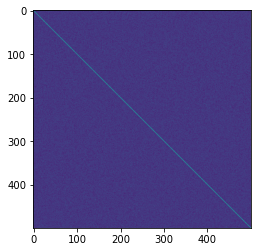

In [8]:
plt.imshow(torch2numpy(model.B[0]['weight']))

In [9]:
torch2numpy(model.B[0]['weight'])

array([[ 5.716399  , -0.049982  , -0.03929942, ...,  0.22322418,
        -0.36075032,  0.06415747],
       [-0.049982  ,  5.679263  ,  0.41047487, ...,  0.36694136,
         0.09405217, -0.12705436],
       [-0.03929942,  0.41047487,  5.765897  , ..., -0.08526605,
        -0.20707147, -0.0348618 ],
       ...,
       [ 0.22322418,  0.36694136, -0.08526605, ...,  3.6762593 ,
        -0.27690554, -0.02166144],
       [-0.36075032,  0.09405217, -0.20707147, ..., -0.27690554,
         6.023473  , -0.27266186],
       [ 0.06415747, -0.12705436, -0.0348618 , ..., -0.02166144,
        -0.27266186,  5.8084693 ]], dtype=float32)

In [17]:
torch.svd(model.Wff[0]['weight'])[2].T

tensor([[-0.0003, -0.0213, -0.0094,  ..., -0.0170, -0.0083,  0.0116],
        [-0.0115, -0.0043,  0.0385,  ..., -0.0256, -0.0101,  0.0402],
        [ 0.0062, -0.0026, -0.0038,  ..., -0.0062,  0.0312, -0.0062],
        ...,
        [-0.0327,  0.0172,  0.0859,  ..., -0.0274, -0.0077,  0.1085],
        [-0.0180, -0.0393, -0.0425,  ..., -0.0113,  0.0153,  0.0442],
        [-0.0353, -0.0339,  0.0746,  ..., -0.0232,  0.0089,  0.0485]],
       device='cuda:0', grad_fn=<PermuteBackward0>)

In [ ]:
activation = F.relu
architecture = [784, 128, 64, 10]
lambda_ = 0.9999
epsilon = 0.01
supervised_lambda_weight = 1e-3
neural_lr_start = 0.001 
neural_lr_stop = 0.0005 
neural_lr_rule = "constant"
neural_lr_decay_multiplier = 0.005
neural_dynamic_iterations = 50

model = CorInfoMaxNudged(architecture, lambda_, epsilon, activation, use_stepLR = True, 
                         sgd_nesterov = False, optimizer_type = "sgd", 
                         optim_lr = 1e-3, stepLR_step_size = 10*3000,)

x, y = next(iter(train_loader))
x, y = x.to(device), y.to(device)
x = x.to(device).view(x.size(0),-1).T
y_one_hot = F.one_hot(y, 10).to(device).T

neurons = model.fast_forward(x, no_grad = True)
model.run_neural_dynamics(x, y_one_hot, neurons, supervised_lambda_weight, 
                          neural_lr_start, neural_lr_stop, lr_rule = neural_lr_rule, 
                          lr_decay_multiplier = neural_lr_decay_multiplier, 
                          neural_dynamic_iterations = neural_dynamic_iterations)

In [ ]:
mbs = x.size(1)
for jj in range(len(neurons)):
    neurons[jj] = neurons[jj].requires_grad_()
corinfo_cost = model.CorInfo_Cost(x, y, neurons)
init_grads = torch.tensor([1 for i in range(mbs)], dtype=torch.float, device=device, requires_grad=True) #Initializing gradients
grads = torch.autograd.grad(corinfo_cost, neurons, grad_outputs=init_grads, create_graph=False) # dPhi/ds

In [ ]:
one_over_epsilon = model.one_over_epsilon
gam_ = model.gam_

x, y = next(iter(train_loader))
x, y = x.to(device), y.to(device)
x = x.to(device).view(x.size(0),-1).T
y_one_hot = F.one_hot(y, 10).to(device).T

Wff = model.Wff
B = model.B

neurons = model.fast_forward(x, no_grad = True)

layers = [x] + neurons
for jj in range(len(Wff)):
    if jj == 0:
        error = - one_over_epsilon * (layers[jj + 1] - (Wff[jj]['weight'] @ layers[jj] + Wff[jj]['bias'])) 
    else:
        error = - one_over_epsilon * (layers[jj + 1] - (Wff[jj]['weight'] @ model.activation(layers[jj]) + Wff[jj]['bias']))

    lateral_term = gam_ * 0.5 * (layers[jj + 1].T @ B[jj]['weight'] @ layers[jj + 1])
    corinfo_cost = torch.sum(error * error, 0)
    


In [ ]:
error.shape
torch.sum(error * error, 0).shape

In [ ]:
outer_prod_broadcasting((B[jj]['weight'] @ layers[jj + 1]), layers[jj + 1].T).shape

In [ ]:
layers[jj + 1][:,2].T @ B[jj]['weight'] @ layers[jj + 1][:,2]

In [ ]:
torch.sum((B[jj]['weight'] @ layers[jj + 1]) * layers[jj + 1], 0)

In [ ]:
(B[jj]['weight'] @ layers[jj + 1]).shape, layers[jj + 1].shape

In [ ]:
trn_acc_list = []
tst_acc_list = []
random_sign = False
n_epochs = 50

for epoch_ in range(n_epochs):
    for idx, (x, y) in tqdm(enumerate(train_loader)):
        x, y = x.to(device), y.to(device)
        x = x.to(device).view(x.size(0),-1).T
        y_one_hot = F.one_hot(y, 10).to(device).T
        #y_one_hot = 0.94 * y_one_hot + 0.03 * torch.ones(*y_one_hot.shape, device = device)
        if random_sign:
            rnd_sgn = 2*np.random.randint(2) - 1
            supervised_lambda_weight = rnd_sgn * supervised_lambda_weight

        model.batch_step(  x, y_one_hot, supervised_lambda_weight,
                           neural_lr_start, neural_lr_stop, neural_lr_rule,
                           neural_lr_decay_multiplier, neural_dynamic_iterations,
                        )

    trn_acc = evaluatePC(model, train_loader, device, False, 
                         printing = False)
    tst_acc = evaluatePC(model, test_loader, device, False, 
                         printing = False)
    trn_acc_list.append(trn_acc)
    tst_acc_list.append(tst_acc)
    
    print("Epoch : {}, Train Accuracy : {}, Test Accuracy : {}".format(epoch_+1, trn_acc, tst_acc))